In [1]:
#KAGGLE LINK :
#      kaggle competitions download -c water-quality-prediction-rk

PROBLEM STATEMENT:

A growing number of factors, including pollution, population expansion, and climate change, are putting the world's water resources in danger. How to obtain enough water to satisfy human demands while also conserving the integrity of aquatic ecosystems is a recurring concern as the world's population rises. The Pacific Institute works on global water resource issues in partnership with stakeholders to make sure that people and nature have access to the water they require to survive today and in the future.
Our aim is to train a machine learning model based on the water quality data provided to you in the training file and further predict the quality estimation result for the test dataset.

COLUMNS:

id: The unique ID for each row.
categoryA - categoryF: 6 category columns with suffix A to F.
featureA - featureI: 9 feature columns with suffix A to I.
compositionA - compositionJ: 10 composition columns with suffix A to J.
unit: The unit of measurement for the result values.
result: The measure for water quality (target variable).
    

In [2]:
# importing necessary libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew,norm


In [3]:
# reading the train data 
train = pd.read_csv(r'water-quality-prediction-rk\train.csv')

In [4]:
train.head()

,id,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,featureA,featureB,featureC,...,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ,unit,result
0,a563699ca2a601c6ac64aa29986a00a90fb42b48741695...,catA_1,catB_0,catC_718,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_6,0.000458
1,91ab3eb3bcf6c8c1c5fe2da9ba671aa5a48c7369d9a50f...,catA_1,catB_0,catC_1309,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_6,0.000335
2,7128c51c554735d6c81862684ad6005ae12d2edbcd4644...,catA_15,catB_0,catC_1309,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_4,0.054072
3,c8144b52e4f63014de0a0d8e1c629bf0b05cb2696cfc23...,catA_0,catB_0,catC_935,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_5,0.061143
4,88d15a5b2df6692f23d105ff1ae82ae026be00c9271eef...,catA_22,catB_0,catC_1325,catD_0,catE_2,catF_0,-40055.250,4.363288,0.729194,...,14.0,0.0,49.0,3.0,2.0,9.0,16.84,15.0,unit_15,0.015439


In [5]:
# reading test data
test = pd.read_csv(r'water-quality-prediction-rk\test.csv')
test.head()

,id,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,featureA,featureB,featureC,...,compositionB,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ,unit
0,939edadbc8e0cddf21c8c5710c4f2f909abd36c196aee8...,catA_6,catB_0,catC_55,catD_0,catE_1,catF_0,325435.125,1.728675,0.032407,...,2.2,28.2,2.7,16.7,3.5,7.6,20.2,27.25,18.9,unit_7
1,fcfed000585350fdc6a982bd1146cd8cdd71d989a2fb01...,catA_6,catB_0,catC_1638,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,10.0,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_7
2,917b412b73b7c1c83f779d2f350acda4d2b14804579e79...,catA_17,catB_0,catC_1400,catD_0,catE_16,catF_0,-19688.875,25.982190,0.000000,...,21.4,9.7,0.0,46.7,2.6,2.4,7.7,21.23,6.1,unit_12
3,012d646dbd712fd4b752aa8761dc18aaf28643c262f859...,catA_5,catB_0,catC_204,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,10.0,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_0
4,77c69c2a873444dfef22131bada7d9504ad731ca8df55d...,catA_5,catB_0,catC_1282,catD_0,catE_2,catF_0,-40055.250,4.363288,0.729194,...,8.0,14.0,0.0,49.0,3.0,2.0,9.0,16.84,15.0,unit_0


In [6]:
print(train.columns,train.shape)
print('\n')
print(test.columns,test.shape)

Index(['id', 'categoryA', 'categoryB', 'categoryC', 'categoryD', 'categoryE',
       'categoryF', 'featureA', 'featureB', 'featureC', 'featureD', 'featureE',
       'featureF', 'featureG', 'featureH', 'featureI', 'compositionA',
       'compositionB', 'compositionC', 'compositionD', 'compositionE',
       'compositionF', 'compositionG', 'compositionH', 'compositionI',
       'compositionJ', 'unit', 'result'],
      dtype='object') (13000, 28)


Index(['id', 'categoryA', 'categoryB', 'categoryC', 'categoryD', 'categoryE',
       'categoryF', 'featureA', 'featureB', 'featureC', 'featureD', 'featureE',
       'featureF', 'featureG', 'featureH', 'featureI', 'compositionA',
       'compositionB', 'compositionC', 'compositionD', 'compositionE',
       'compositionF', 'compositionG', 'compositionH', 'compositionI',
       'compositionJ', 'unit'],
      dtype='object') (7000, 27)


In [7]:
# saving the ID column 
train_ID = train['id']
test_ID = test['id']

# dropping the ID column as it is unnecessary for the prediction process
train.drop("id",axis=1,inplace=True)
test.drop("id",axis=1,inplace=True)

In [8]:
print(train.shape)
print(test.shape)

(13000, 27)
(7000, 26)


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   categoryA     13000 non-null  object 
 1   categoryB     13000 non-null  object 
 2   categoryC     13000 non-null  object 
 3   categoryD     13000 non-null  object 
 4   categoryE     13000 non-null  object 
 5   categoryF     13000 non-null  object 
 6   featureA      12936 non-null  float64
 7   featureB      12936 non-null  float64
 8   featureC      12936 non-null  float64
 9   featureD      12936 non-null  float64
 10  featureE      12936 non-null  float64
 11  featureF      13000 non-null  float64
 12  featureG      12936 non-null  float64
 13  featureH      12936 non-null  float64
 14  featureI      12936 non-null  float64
 15  compositionA  12936 non-null  float64
 16  compositionB  12936 non-null  float64
 17  compositionC  12936 non-null  float64
 18  compositionD  12936 non-nu

In [10]:
train.dtypes.value_counts()

float64    20
object      7
dtype: int64

In [11]:
train.nunique(axis=0)

categoryA         167
categoryB           2
categoryC        2212
categoryD           3
categoryE          25
categoryF           3
featureA           23
featureB           23
featureC           19
featureD           23
featureE           23
featureF           23
featureG           23
featureH           11
featureI           23
compositionA        5
compositionB       21
compositionC       23
compositionD        9
compositionE       22
compositionF       20
compositionG       15
compositionH       22
compositionI       23
compositionJ       21
unit               19
result          10337
dtype: int64

In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
featureA,12936.0,1.165592e+05,1.465020e+05,-8.374975e+04,5.674475e+04,7.580838e+04,7.580838e+04,5.822110e+05
featureB,12936.0,4.526278e+00,3.180817e+00,1.064468e+00,4.363288e+00,4.457840e+00,4.457840e+00,2.598219e+01
featureC,12936.0,1.329723e-01,2.641483e-01,0.000000e+00,5.717646e-03,5.717646e-03,3.240702e-02,7.291935e-01
featureD,12936.0,1.503411e+02,7.509367e+01,1.814855e+01,1.222994e+02,1.222994e+02,1.379766e+02,5.114759e+02
featureE,12936.0,2.644618e+01,6.665619e+00,3.875411e+00,2.462550e+01,3.083191e+01,3.083191e+01,3.876723e+01
featureF,13000.0,2.175385e-01,2.380893e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+02
featureG,12936.0,2.335365e+12,8.937298e+11,2.887150e+10,1.464509e+12,2.806036e+12,2.806036e+12,3.781699e+12
featureH,12936.0,1.504719e+01,3.200037e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.715892e+01
featureI,12936.0,5.020210e+07,2.412360e+07,5.300380e+05,2.586796e+07,5.094169e+07,7.117635e+07,7.117635e+07
compositionA,12936.0,1.649227e-01,7.432285e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00


In [13]:
#descriptuve statistics summary of target variable
train['result'].describe()

count    13000.000000
mean         0.144223
std          0.224062
min          0.000000
25%          0.003875
50%          0.027909
75%          0.168678
max          1.000000
Name: result, dtype: float64

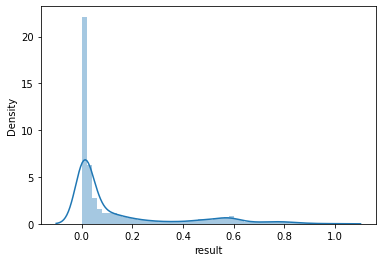

skewness: 1.671125
kurtosis: 1.590801


In [14]:
# Skewness is a measure of symmetry, or more precisely, the lack of symmetry.
# A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. 
# Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

import warnings
warnings.filterwarnings("ignore")

#kernel density plot
sns.distplot(train.result)
plt.show()

print("skewness: %f" % train['result'].skew())
print("kurtosis: %f" % train ['result'].kurt())


here,the data is positively skewed.


In [15]:
train.skew()

featureA         1.306407
featureB         3.797456
featureC         1.795937
featureD         1.003517
featureE        -0.889903
featureF        31.217804
featureG        -1.312239
featureH         1.784785
featureI        -0.646499
compositionA     4.607279
compositionB    -0.802405
compositionC    -0.552444
compositionD     4.783189
compositionE     0.422508
compositionF     3.682130
compositionG     1.205124
compositionH     0.901407
compositionI     1.705621
compositionJ     1.677662
result           1.671125
dtype: float64

In [16]:
train.isnull().sum()

categoryA        0
categoryB        0
categoryC        0
categoryD        0
categoryE        0
categoryF        0
featureA        64
featureB        64
featureC        64
featureD        64
featureE        64
featureF         0
featureG        64
featureH        64
featureI        64
compositionA    64
compositionB    64
compositionC    64
compositionD    64
compositionE    64
compositionF    64
compositionG    64
compositionH    64
compositionI    64
compositionJ    64
unit             0
result           0
dtype: int64

In [17]:
train['featureA'].median()
train['featureA'].fillna(train['featureA'].median(),inplace=True)
train['featureB'].median()
train['featureB'].fillna(train['featureB'].median(),inplace=True)
train['featureC'].median()
train['featureC'].fillna(train['featureC'].median(),inplace=True)
train['featureD'].median()
train['featureD'].fillna(train['featureD'].median(),inplace=True)
train['featureE'].median()
train['featureE'].fillna(train['featureE'].median(),inplace=True)
train['featureG'].median()
train['featureG'].fillna(train['featureG'].median(),inplace=True)
train['featureH'].median()
train['featureH'].fillna(train['featureH'].median(),inplace=True)
train['featureI'].median()
train['featureI'].fillna(train['featureI'].median(),inplace=True)

In [18]:
train['compositionA'].median()
train['compositionA'].fillna(train['compositionA'].median(),inplace=True)
train['compositionB'].median()
train['compositionB'].fillna(train['compositionB'].median(),inplace=True)
train['compositionC'].median()
train['compositionC'].fillna(train['compositionC'].median(),inplace=True)
train['compositionD'].median()
train['compositionD'].fillna(train['compositionD'].median(),inplace=True)
train['compositionE'].median()
train['compositionE'].fillna(train['compositionE'].median(),inplace=True)
train['compositionF'].median()
train['compositionF'].fillna(train['compositionF'].median(),inplace=True)
train['compositionG'].median()
train['compositionG'].fillna(train['compositionG'].median(),inplace=True)
train['compositionH'].median()
train['compositionH'].fillna(train['compositionH'].median(),inplace=True)
train['compositionI'].median()
train['compositionI'].fillna(train['compositionI'].median(),inplace=True)
train['compositionJ'].median()
train['compositionJ'].fillna(train['compositionJ'].median(),inplace=True)

In [19]:
train.isnull().sum().sum()

0

The missing values has been filled with median corresponding to their column median. 


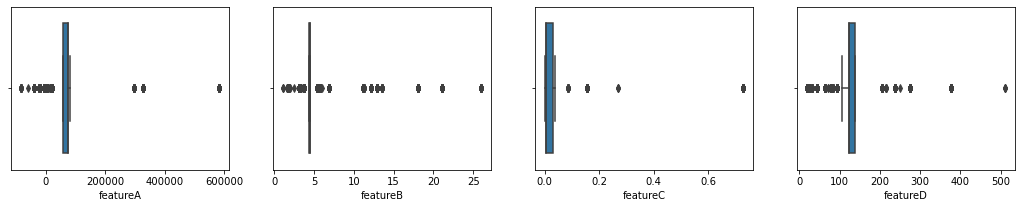

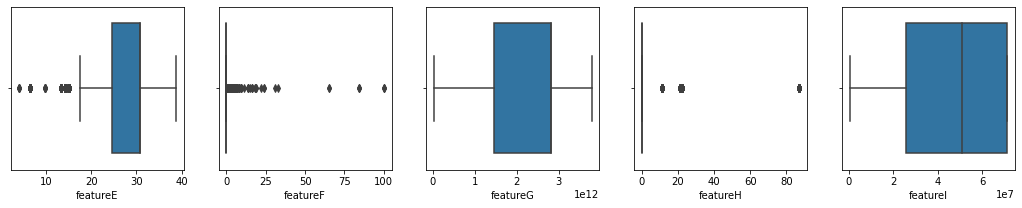

In [20]:
#plotting boxplot to know the outliers of feature data
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (18,3))
plt.subplot(1,4,1)
sns.boxplot(train['featureA'])
plt.subplot(1,4,2)
sns.boxplot(train['featureB'])
plt.subplot(1,4,3)
sns.boxplot(train['featureC'])
plt.subplot(1,4,4)
sns.boxplot(train['featureD'])
plt.show()
plt.figure(figsize = (18,3))
plt.subplot(1,5,1)
sns.boxplot(train['featureE'])
plt.subplot(1,5,2)
sns.boxplot(train['featureF'])
plt.subplot(1,5,3)
sns.boxplot(train['featureG'])
plt.subplot(1,5,4)
sns.boxplot(train['featureH'])
plt.subplot(1,5,5)
sns.boxplot(train['featureI'])
plt.show()

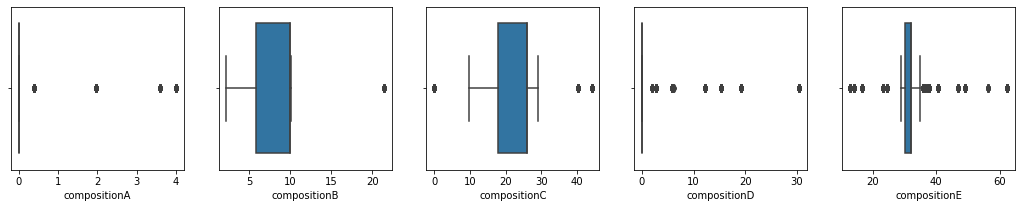

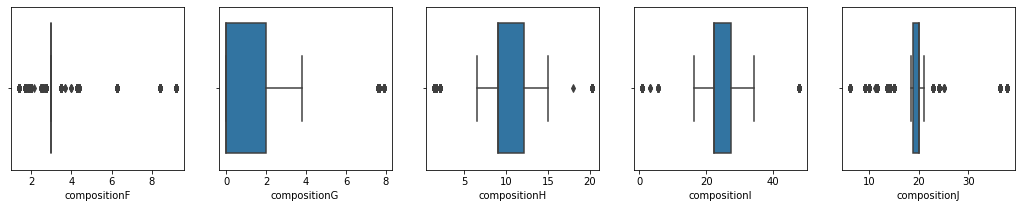

In [21]:
#plotting boxplot to know the outliers of Composition data
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (18,3))
plt.subplot(1,5,1)
sns.boxplot(train['compositionA'])
plt.subplot(1,5,2)
sns.boxplot(train['compositionB'])
plt.subplot(1,5,3)
sns.boxplot(train['compositionC'])
plt.subplot(1,5,4)
sns.boxplot(train['compositionD'])
plt.subplot(1,5,5)
sns.boxplot(train['compositionE'])
plt.show()
plt.figure(figsize = (18,3))
plt.subplot(1,5,1)           
sns.boxplot(train['compositionF'])
plt.subplot(1,5,2)
sns.boxplot(train['compositionG'])
plt.subplot(1,5,3)
sns.boxplot(train['compositionH'])
plt.subplot(1,5,4)
sns.boxplot(train['compositionI'])
plt.subplot(1,5,5)
sns.boxplot(train['compositionJ'])                  
plt.show()

In [22]:
# Checking and removing any duplicates from the data
train[train.duplicated()]
train.drop_duplicates(inplace=True)
train

,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,featureA,featureB,featureC,featureD,...,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ,unit,result
0,catA_1,catB_0,catC_718,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,122.299437,...,26.00,0.0,32.00,3.0,0.00,9.00,22.26,20.00,unit_6,0.000458
1,catA_1,catB_0,catC_1309,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,122.299437,...,26.00,0.0,32.00,3.0,0.00,9.00,22.26,20.00,unit_6,0.000335
2,catA_15,catB_0,catC_1309,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,122.299437,...,26.00,0.0,32.00,3.0,0.00,9.00,22.26,20.00,unit_4,0.054072
3,catA_0,catB_0,catC_935,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,122.299437,...,26.00,0.0,32.00,3.0,0.00,9.00,22.26,20.00,unit_5,0.061143
4,catA_22,catB_0,catC_1325,catD_0,catE_2,catF_0,-40055.250,4.363288,0.729194,93.677197,...,14.00,0.0,49.00,3.0,2.00,9.00,16.84,15.00,unit_15,0.015439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,catA_3,catB_0,catC_639,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,122.299437,...,26.00,0.0,32.00,3.0,0.00,9.00,22.26,20.00,unit_1,0.008260
12996,catA_8,catB_0,catC_445,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,122.299437,...,26.00,0.0,32.00,3.0,0.00,9.00,22.26,20.00,unit_9,0.002395
12997,catA_25,catB_0,catC_445,catD_0,catE_0,catF_1,75808.375,4.457840,0.005718,122.299437,...,26.00,0.0,32.00,3.0,0.00,9.00,22.26,20.00,unit_12,0.150982
12998,catA_7,catB_0,catC_2322,catD_0,catE_5,catF_0,18927.000,21.007457,0.000387,18.148547,...,13.13,0.0,35.88,1.7,0.73,1.45,28.12,37.83,unit_8,0.488908


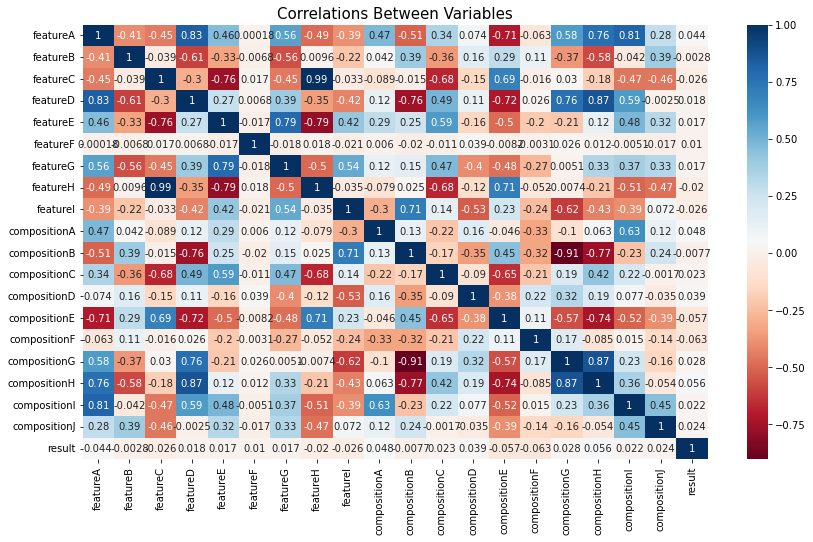

In [23]:
plt.figure(figsize=(14,8))
sns.heatmap(train.corr(),annot=True, cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show() #'RdBu' says take red to blue and having white in the middle , Red is negatively correlated and Blue is positively correlated

In [24]:
#converting of categorical columns to numerical columns
# ordinal encoding to preserve order of categorical data i.e. cold, warm, hot; low, medium, high.
# You use label encoding or one hot for categorical data, where there's no order in data i.e. dog, cat, whale.

from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

for col in train:
    if train[col].dtype=="object":
        train[col] = enc.fit_transform(train[col].values.reshape(-1,1))
train

,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,featureA,featureB,featureC,featureD,...,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ,unit,result
0,1.0,0.0,1925.0,0.0,0.0,0.0,75808.375,4.457840,0.005718,122.299437,...,26.00,0.0,32.00,3.0,0.00,9.00,22.26,20.00,15.0,0.000458
1,1.0,0.0,287.0,0.0,0.0,0.0,75808.375,4.457840,0.005718,122.299437,...,26.00,0.0,32.00,3.0,0.00,9.00,22.26,20.00,15.0,0.000335
2,49.0,0.0,287.0,0.0,0.0,0.0,75808.375,4.457840,0.005718,122.299437,...,26.00,0.0,32.00,3.0,0.00,9.00,22.26,20.00,13.0,0.054072
3,0.0,0.0,2146.0,0.0,0.0,0.0,75808.375,4.457840,0.005718,122.299437,...,26.00,0.0,32.00,3.0,0.00,9.00,22.26,20.00,14.0,0.061143
4,82.0,0.0,302.0,0.0,11.0,0.0,-40055.250,4.363288,0.729194,93.677197,...,14.00,0.0,49.00,3.0,2.00,9.00,16.84,15.00,7.0,0.015439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,90.0,0.0,1840.0,0.0,0.0,0.0,75808.375,4.457840,0.005718,122.299437,...,26.00,0.0,32.00,3.0,0.00,9.00,22.26,20.00,1.0,0.008260
12996,145.0,0.0,1639.0,0.0,0.0,0.0,75808.375,4.457840,0.005718,122.299437,...,26.00,0.0,32.00,3.0,0.00,9.00,22.26,20.00,18.0,0.002395
12997,85.0,0.0,1639.0,0.0,0.0,1.0,75808.375,4.457840,0.005718,122.299437,...,26.00,0.0,32.00,3.0,0.00,9.00,22.26,20.00,4.0,0.150982
12998,134.0,0.0,1080.0,0.0,20.0,0.0,18927.000,21.007457,0.000387,18.148547,...,13.13,0.0,35.88,1.7,0.73,1.45,28.12,37.83,17.0,0.488908


MODEL BUILDING

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# splitting of data
x = train.drop('result', axis=1)
y = train['result']

In [27]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [28]:
# Standardize the data using StandardScaler
scaler = StandardScaler()
x_train_standard = scaler.fit_transform(x_train)
x_test_standard= scaler.transform(x_test)

In [29]:
# K-Nearest Neighbor Regressor
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=4)
knn.fit(x_train_standard,y_train)

KNeighborsRegressor(n_neighbors=4)

In [30]:
trainpreds_knn=knn.predict(x_train_standard)
testpreds_knn=knn.predict(x_test_standard)

In [31]:
knn.score(x_train_standard,y_train)

0.8829300014372965

In [32]:
knn.score(x_test_standard,y_test)

0.7499774082876591

In [33]:
# Error Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(mean_squared_error(y_train,trainpreds_knn))
print(mean_squared_error(y_test,testpreds_knn))
print(mean_absolute_error(y_train,trainpreds_knn))
print(mean_absolute_error(y_test,testpreds_knn))
print(r2_score(y_train,trainpreds_knn))
print(r2_score(y_test,testpreds_knn))

0.005890460966617773
0.012597654359128577
0.04019967073476816
0.05808581781317542
0.8829300014372965
0.7499774082876591


The model works good with train data but it doesnot work well with test data so the model may be overfitting.In that case the model wont work well with new data so we have to increase the preformance of the test data.THis can be done by doing various techniques like hyperparameter tuning,ensemble methods,feature engineering etc...


In [58]:
# tuning the data set with changing k value
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train_standard,y_train)

KNeighborsRegressor(n_neighbors=3)

In [59]:
trainpreds_knn=knn.predict(x_train_standard)
testpreds_knn=knn.predict(x_test_standard)

In [60]:
knn.score(x_train_standard,y_train)

0.9019349644555957

In [61]:
knn.score(x_test_standard,y_test)

0.7489835003678292

In [62]:
# Error Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(mean_squared_error(y_train,trainpreds_knn))
print(mean_squared_error(y_test,testpreds_knn))
print(mean_absolute_error(y_train,trainpreds_knn))
print(mean_absolute_error(y_test,testpreds_knn))
print(r2_score(y_train,trainpreds_knn))
print(r2_score(y_test,testpreds_knn))

0.004934212617717814
0.01264773346739261
0.0361453380379977
0.05798441866806455
0.9019349644555957
0.7489835003678292


ANALYZING THE TEST DATA

In [34]:
# retriving test data
test.head()

,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,featureA,featureB,featureC,featureD,...,compositionB,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ,unit
0,catA_6,catB_0,catC_55,catD_0,catE_1,catF_0,325435.125,1.728675,0.032407,274.708982,...,2.2,28.2,2.7,16.7,3.5,7.6,20.2,27.25,18.9,unit_7
1,catA_6,catB_0,catC_1638,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,122.299437,...,10.0,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_7
2,catA_17,catB_0,catC_1400,catD_0,catE_16,catF_0,-19688.875,25.982190,0.000000,30.993471,...,21.4,9.7,0.0,46.7,2.6,2.4,7.7,21.23,6.1,unit_12
3,catA_5,catB_0,catC_204,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,122.299437,...,10.0,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_0
4,catA_5,catB_0,catC_1282,catD_0,catE_2,catF_0,-40055.250,4.363288,0.729194,93.677197,...,8.0,14.0,0.0,49.0,3.0,2.0,9.0,16.84,15.0,unit_0


In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   categoryA     7000 non-null   object 
 1   categoryB     7000 non-null   object 
 2   categoryC     7000 non-null   object 
 3   categoryD     7000 non-null   object 
 4   categoryE     7000 non-null   object 
 5   categoryF     7000 non-null   object 
 6   featureA      6957 non-null   float64
 7   featureB      6957 non-null   float64
 8   featureC      6957 non-null   float64
 9   featureD      6957 non-null   float64
 10  featureE      6957 non-null   float64
 11  featureF      7000 non-null   float64
 12  featureG      6957 non-null   float64
 13  featureH      6957 non-null   float64
 14  featureI      6957 non-null   float64
 15  compositionA  6957 non-null   float64
 16  compositionB  6957 non-null   float64
 17  compositionC  6957 non-null   float64
 18  compositionD  6957 non-null 

In [36]:
test.dtypes.value_counts()

float64    19
object      7
dtype: int64

In [37]:
test.nunique(axis=0)

categoryA        140
categoryB          2
categoryC       1755
categoryD          3
categoryE         25
categoryF          3
featureA          23
featureB          23
featureC          19
featureD          23
featureE          23
featureF           1
featureG          23
featureH          12
featureI          23
compositionA       6
compositionB      20
compositionC      23
compositionD      11
compositionE      21
compositionF      20
compositionG      15
compositionH      22
compositionI      23
compositionJ      22
unit              19
dtype: int64

In [38]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
featureA,6957.0,1.098327e+05,1.411432e+05,-8.374975e+04,2.125675e+04,7.580838e+04,7.580838e+04,5.822110e+05
featureB,6957.0,4.887512e+00,3.875819e+00,1.728675e+00,4.363288e+00,4.457840e+00,4.457840e+00,2.598219e+01
featureC,6957.0,1.245513e-01,2.540292e-01,0.000000e+00,5.717646e-03,5.717646e-03,3.240702e-02,7.291935e-01
featureD,6957.0,1.490658e+02,7.764056e+01,1.454829e+01,1.071280e+02,1.222994e+02,1.379766e+02,3.773796e+02
featureE,6957.0,2.582080e+01,6.998015e+00,4.042465e+00,2.199909e+01,2.829370e+01,3.083191e+01,3.876723e+01
featureF,7000.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
featureG,6957.0,2.196448e+12,9.925807e+11,2.887150e+10,1.464509e+12,2.757620e+12,2.806036e+12,3.781699e+12
featureH,6957.0,1.450998e+01,3.074097e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.715892e+01
featureI,6957.0,4.731804e+07,2.562034e+07,5.300380e+05,2.586796e+07,5.094169e+07,7.117635e+07,7.117635e+07
compositionA,6957.0,1.492712e-01,7.097795e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00


In [39]:
test.skew()

featureA        1.244186
featureB        3.307080
featureC        1.932133
featureD        0.973144
featureE       -0.952261
featureF        0.000000
featureG       -1.079955
featureH        1.882144
featureI       -0.489445
compositionA    4.952093
compositionB   -0.219666
compositionC   -0.361322
compositionD    4.546312
compositionE    0.470081
compositionF    3.295140
compositionG    1.397763
compositionH    0.764734
compositionI    0.750387
compositionJ    1.281656
dtype: float64

In [40]:
test.isnull().sum()

categoryA        0
categoryB        0
categoryC        0
categoryD        0
categoryE        0
categoryF        0
featureA        43
featureB        43
featureC        43
featureD        43
featureE        43
featureF         0
featureG        43
featureH        43
featureI        43
compositionA    43
compositionB    43
compositionC    43
compositionD    43
compositionE    43
compositionF    43
compositionG    43
compositionH    43
compositionI    43
compositionJ    43
unit             0
dtype: int64

In [41]:
test['featureA'].median()
test['featureA'].fillna(test['featureA'].median(),inplace=True)
test['featureB'].median()
test['featureB'].fillna(test['featureB'].median(),inplace=True)
test['featureC'].median()
test['featureC'].fillna(test['featureC'].median(),inplace=True)
test['featureD'].median()
test['featureD'].fillna(test['featureD'].median(),inplace=True)
test['featureE'].median()
test['featureE'].fillna(test['featureE'].median(),inplace=True)
test['featureG'].median()
test['featureG'].fillna(test['featureG'].median(),inplace=True)
test['featureH'].median()
test['featureH'].fillna(test['featureH'].median(),inplace=True)
test['featureI'].median()
test['featureI'].fillna(test['featureI'].median(),inplace=True)

In [42]:
test['compositionA'].median()
test['compositionA'].fillna(test['compositionA'].median(),inplace=True)
test['compositionB'].median()
test['compositionB'].fillna(test['compositionB'].median(),inplace=True)
test['compositionC'].median()
test['compositionC'].fillna(test['compositionC'].median(),inplace=True)
test['compositionD'].median()
test['compositionD'].fillna(test['compositionD'].median(),inplace=True)
test['compositionE'].median()
test['compositionE'].fillna(test['compositionE'].median(),inplace=True)
test['compositionF'].median()
test['compositionF'].fillna(test['compositionF'].median(),inplace=True)
test['compositionG'].median()
test['compositionG'].fillna(test['compositionG'].median(),inplace=True)
test['compositionH'].median()
test['compositionH'].fillna(test['compositionH'].median(),inplace=True)
test['compositionI'].median()
test['compositionI'].fillna(test['compositionI'].median(),inplace=True)
test['compositionJ'].median()
test['compositionJ'].fillna(test['compositionJ'].median(),inplace=True)

In [43]:
test.isnull().sum().sum()

0

The missing values has been filled with median corresponding to their column median.

In [44]:
test.dtypes.value_counts()

float64    19
object      7
dtype: int64

In [45]:
# Checking and removing any duplicates from the data
test[test.duplicated()]
test.drop_duplicates(inplace=True)
test

,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,featureA,featureB,featureC,featureD,...,compositionB,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ,unit
0,catA_6,catB_0,catC_55,catD_0,catE_1,catF_0,325435.125,1.728675,0.032407,274.708982,...,2.2,28.2,2.7,16.7,3.5,7.6,20.2,27.25,18.9,unit_7
1,catA_6,catB_0,catC_1638,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,122.299437,...,10.0,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_7
2,catA_17,catB_0,catC_1400,catD_0,catE_16,catF_0,-19688.875,25.982190,0.000000,30.993471,...,21.4,9.7,0.0,46.7,2.6,2.4,7.7,21.23,6.1,unit_12
3,catA_5,catB_0,catC_204,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,122.299437,...,10.0,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_0
4,catA_5,catB_0,catC_1282,catD_0,catE_2,catF_0,-40055.250,4.363288,0.729194,93.677197,...,8.0,14.0,0.0,49.0,3.0,2.0,9.0,16.84,15.0,unit_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,catA_5,catB_0,catC_524,catD_0,catE_2,catF_0,-40055.250,4.363288,0.729194,93.677197,...,8.0,14.0,0.0,49.0,3.0,2.0,9.0,16.84,15.0,unit_0
6996,catA_5,catB_0,catC_1308,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,122.299437,...,10.0,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_0
6997,catA_0,catB_0,catC_2867,catD_0,catE_2,catF_0,-40055.250,4.363288,0.729194,93.677197,...,8.0,14.0,0.0,49.0,3.0,2.0,9.0,16.84,15.0,unit_5
6998,catA_5,catB_0,catC_2216,catD_0,catE_1,catF_0,325435.125,1.728675,0.032407,274.708982,...,2.2,28.2,2.7,16.7,3.5,7.6,20.2,27.25,18.9,unit_0


In [46]:
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

enco = OrdinalEncoder()

for col in test:
    if test[col].dtype=="object":
        test[col] = enco.fit_transform(test[col].values.reshape(-1,1))
test

,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,featureA,featureB,featureC,featureD,...,compositionB,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ,unit
0,99.0,0.0,1415.0,0.0,1.0,0.0,325435.125,1.728675,0.032407,274.708982,...,2.2,28.2,2.7,16.7,3.5,7.6,20.2,27.25,18.9,16.0
1,99.0,0.0,435.0,0.0,0.0,0.0,75808.375,4.457840,0.005718,122.299437,...,10.0,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,16.0
2,51.0,0.0,274.0,0.0,8.0,0.0,-19688.875,25.982190,0.000000,30.993471,...,21.4,9.7,0.0,46.7,2.6,2.4,7.7,21.23,6.1,4.0
3,88.0,0.0,716.0,0.0,0.0,0.0,75808.375,4.457840,0.005718,122.299437,...,10.0,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,0.0
4,88.0,0.0,201.0,0.0,12.0,0.0,-40055.250,4.363288,0.729194,93.677197,...,8.0,14.0,0.0,49.0,3.0,2.0,9.0,16.84,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,88.0,0.0,1395.0,0.0,12.0,0.0,-40055.250,4.363288,0.729194,93.677197,...,8.0,14.0,0.0,49.0,3.0,2.0,9.0,16.84,15.0,0.0
6996,88.0,0.0,215.0,0.0,0.0,0.0,75808.375,4.457840,0.005718,122.299437,...,10.0,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,0.0
6997,0.0,0.0,1189.0,0.0,12.0,0.0,-40055.250,4.363288,0.729194,93.677197,...,8.0,14.0,0.0,49.0,3.0,2.0,9.0,16.84,15.0,14.0
6998,88.0,0.0,823.0,0.0,1.0,0.0,325435.125,1.728675,0.032407,274.708982,...,2.2,28.2,2.7,16.7,3.5,7.6,20.2,27.25,18.9,0.0
